<a href="https://colab.research.google.com/github/YCYoon2015/DL_zero_to_all_PyTorch/blob/master/210908_Basic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi variable Linear Regression
다변수 선형회귀

변수가 여러개일 경우

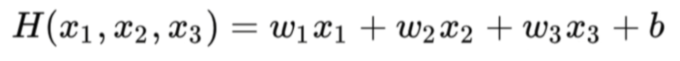

위 식을 matrix로 만들어서 사용한다.

H(X) = XW

X는 1행, W는 1열

# 코드 구현

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.6.0


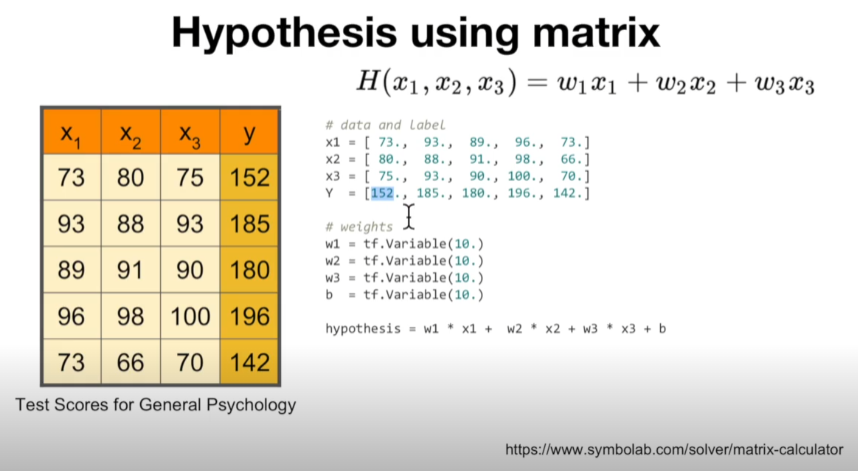

In [ ]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

# weights
w1 = tf.Variable(tf.random.normal((1,))) # 초기값을 랜덤으로 준다.
w2 = tf.Variable(tf.random.normal((1,)))
w3 = tf.Variable(tf.random.normal((1,)))
b  = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# 경사하강법을 통해 최소 cost를 찾아가는 과정
for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape: # 그래디언트를 기록하고 역전파하면서 기록된 값을 계간
        hypothesis = w1 * x1 +  w2 * x2 + w3 * x3 + b # 일반적인 가설
        cost = tf.reduce_mean(tf.square(hypothesis - Y)) # 에러의 제곱 평균 (일반적 오차)
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b]) # gradientTape에 저장된 기울기 값을 불러온다.
    # 각 변수에 cost 함수에서 기울기 w1 w2 w3 b를 대입하는 함수이다.
    
    # update w1,w2,w3 and b 업데이트 과정
    w1.assign_sub(learning_rate * w1_grad) # learnig_rate만큼 기울기값을 곱해서 원래값에서 빼준다.여기서 assign함수
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
      print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |   31227.6777
   50 |     353.2303
  100 |      10.6289
  150 |       6.8103
  200 |       6.7509
  250 |       6.7333
  300 |       6.7162
  350 |       6.6991
  400 |       6.6821
  450 |       6.6651
  500 |       6.6482
  550 |       6.6314
  600 |       6.6145
  650 |       6.5978
  700 |       6.5810
  750 |       6.5643
  800 |       6.5477
  850 |       6.5311
  900 |       6.5145
  950 |       6.4981
 1000 |       6.4816


Matrix 사용

In [ ]:

data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
# np를 이용해서 자른다. 슬라이싱 
X = data[:, :-1] # [행시작:행끝, 열시작:열끝]
y = data[:, [-1]] # [행시작:행끝, [선택열]]

# 처음값을 랜덤
W = tf.Variable(tf.random.normal((3, 1))) # shape 입력 (3,1)
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
# 예측함수
def predict(X):
    return tf.matmul(X, W) + b # H = XW 이다

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape: # GradientTape는 결국 W, b 기울기 저장용
        cost = tf.reduce_mean((tf.square(predict(X) - y))) # cost 구하기

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b]) # 저장된 기울기 뽑아오기

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad) # 리뉴얼
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 46479.6992
  100 |     9.3226
  200 |     3.5989
  300 |     3.5960
  400 |     3.5938
  500 |     3.5916
  600 |     3.5895
  700 |     3.5873
  800 |     3.5851
  900 |     3.5830
 1000 |     3.5808
 1100 |     3.5787
 1200 |     3.5765
 1300 |     3.5744
 1400 |     3.5722
 1500 |     3.5701
 1600 |     3.5679
 1700 |     3.5658
 1800 |     3.5637
 1900 |     3.5615
 2000 |     3.5594
